<h1>Multivariate Gaussian density </h1>

The Multivariate Gaussian (MVG) density probability function (pdf) is defined as: <br>
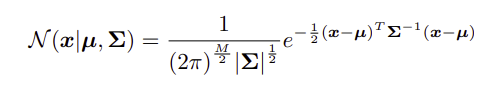 <br>

where M is the size of the feature vector x, and |Σ| is the determinant of Σ.
To avoid numerical issues due to exponentiation of large numbers, in many practical cases it’s more
convenient to work with the logarithm of the density, which is defined as: <br>
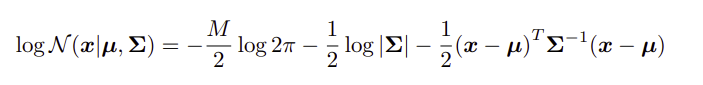 <br>

The aim is to write a function `logpdf_GAU_ND(x, mu, C)`, to calculate the log density. x is a **single sample** belonging to the dataset, mu should
be a numpy array of shape (M, 1), whereas C is a numpy array of shape (M, M) representing the
covariance matrix Σ. <br>
**At the end, to plot the actual density, pdf, I just have to perform:** $exp(log(pdf)) = pdf$

In [124]:
import numpy as np

In [125]:
#Prerequisite functions, used in previous labs:
def vcol(x):
    return x.reshape((x.size, 1))

def vrow(x):
    return x.reshape((1, x.size))

def compute_mu_C(D):
    mu = vcol(D.mean(1))
    C = ((D-mu) @ (D-mu).T) / float(D.shape[1])
    return mu, C

In [126]:
def logpdf_GAU_ND_singleSample(x, mu, C):
    #Compute the log of the probability density function of a multivariate Gaussian distribution
    """
    Parameters
    - x: numpy array of shape (M, 1) -> it's a single sample having M features.
         x is a column vector!
    - mu: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution

    Returned values:
    - logpdf: float -> the log of the probability density function of the multivariate Gaussian distribution
    """

    #Since x is a columns vector of shape (M, 1):
    M = x.shape[0]  #M is the number of features

    #Compute te inverse of the covariance matrix
    C_inv = np.linalg.inv(C)

    #Compute the log of the determinant of the covariance matrix
    #the function np.linalg.slogdet returns a tuple (sign, logdet)
    #the first element of the tuple is the sign of the determinant, which is positive for covariance matrices, and which is not needed here
    #the second element of the tupe is the log determinant of C
    C_logDet = np.linalg.slogdet(C)[1]

    #return -0.5 * M * np.log(2*np.pi) - 0.5 *C_logDet - 0.5 * (x-mu).T @ C_inv @ (x-mu)
    return -0.5 * (M * np.log(2*np.pi) + C_logDet + (x-mu).T @ C_inv @ (x-mu))

Now, it's possible to extend this function to the case where we have X which is a matrix of shape $M × N$ containing multiple samples $[x_1, x_2, ...., x_N]$. <br>
It can be convenient to write the function `logpdf_GAU_ND(X, mu, C)` so that it takes as argument a $M × N$ matrix X rather than a single sample x, and computes the vector of log-densities
$Y = [log N (x_1|µ, Σ). . . log N (x_N |µ, Σ)]$:

In [127]:
def logpdf_GAU_ND_Loop(X, mu, C):
    #Compute the log of the probability density function of a multivariate Gaussian distribution
    """
    Parameters
    - X: numpy array of shape (M, N) -> it contains multiple samples [x1, x2, ..., xN] having M features.
         X is a matrix of shape (M, N)!
    - mu: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution

    Returned values:
    - logpdf: float -> the log of the probability density function of the multivariate Gaussian distribution
    """

    #Attempt 1: Using a loop
    #Loop over all teh samples and for each sample call the function logpdf_GAU_ND_singleSample
    N = X.shape[1]
    result = []

    for i in range(N):
        #print("Shape of X[:, i]:", X[:, i].shape) #-> it must always be (M,) 
        result.append(logpdf_GAU_ND_singleSample(X[:, i], mu, C))

    #return a numpy array and not a list
    """
    The list is structured as follows, for ex:
    [[[-21.51551212]],

     [[-21.42552223]],

     ....]

     So I have to flatten it to get a 1D array. Do I use flatten() or ravel()?
    - flatten is a method of an ndarray object and hence can only be called for true numpy arrays.
    - ravel is a library-level function and hence can be called on any object that can successfully be parsed.

     For example ravel will work on a list of ndarrays, while flatten is not available for that type of object.
     In this case, both will work, but ravel is more general and hence recommended.
    """
    
    #At the end, I return a np array of shape (N, 1) because I iterated N times (because I got N samples) and for each iteration I got a scalar value
    
    return np.array(result).ravel()

### Test with sample data

In this first case we use a dataset that has just **1 dimension**. Since M = 1, **the MVG pdf calculation is equivalent to a univariate Gaussian pdf calculation**. <br>
As a matter of facts, with M = 1 the MVG pdf formula is reduced to: <br>
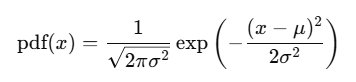 <br>
Which is the formula for the univariate Gaussian pdf.

In [128]:
import matplotlib.pyplot as plt

In [129]:
XPlot = np.linspace(-8, 12, 1000)    #Shape (1000,)
XPlot = vrow(XPlot)                  #Shape (1, 1000)
m = np.ones((1,1)) * 1.0             #Shape (1, 1)
C = np.ones((1,1)) * 2.0             #Shape (1, 1)

In [130]:
#print M, N
print("Shape of XPlot:", XPlot.shape)
print(f"M is {XPlot.shape[0]}")
print(f"N is {XPlot.shape[1]}")

Shape of XPlot: (1, 1000)
M is 1
N is 1000


In [131]:
#Compute the log of the probability density function of the multivariate Gaussian distribution
#In this case, since M = 1 the MVG pdf is equivalent to the univariate Gaussian pdf
logpdf = logpdf_GAU_ND_Loop(XPlot, m, C)

print(f"Shape of logpdf: {logpdf.shape}")
print(f"First 10 elements of logpdf: {logpdf[:10]}")

Shape of logpdf: (1000,)
First 10 elements of logpdf: [-21.51551212 -21.42552223 -21.33573274 -21.24614366 -21.15675497
 -21.06756668 -20.97857879 -20.88979131 -20.80120422 -20.71281754]


Now I plot the density. **To plot the actual density, pdf, I just have to perform:** $exp(log(pdf)) = pdf$

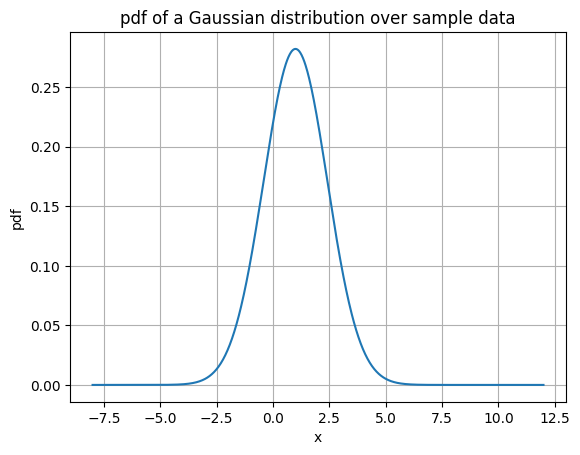

In [132]:
plt.figure()
#I use the exponential scale to plot the logpdf, so I end up plotting the exp(log(pdf)) = pdf
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND_Loop(XPlot, m, C)) )
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('pdf of a Gaussian distribution over sample data')
plt.grid()
plt.show()


We can observer the classic *bell shape* of a Gaussian distributed random variable!

### Optimizing the `logpdf_GAU_ND(X, mu, C)` function to achieve a better complexity
The approach using the for loop can be a potential bottleneck if the dataset has a very large number of samples, because the complexity is linear to the number of samples. <br>
Broadcasting and re-arranging of the computations can be used in this case to significantly
speed up the computation of Y , and to avoid explicitly looping over the elements of X. 

The term to optimize in order to avoid iterating through all the columns is the key term in the multivariate Gaussian distribution (Beware: C = Σ is the Cov Matrix, later in the code I'll just write C instead of Σ for the seek of simplicity):
$$
(X - \mu)^T Σ^{-1} (X - \mu)
$$
Where:  
- $X$ is a matrix of **data points** with shape $(M, N)$, where $M$ is the number of features (dimensions) and $N$ is the number of samples (data points).
- $\mu$  is the mean vector of the distribution with shape $(M,)$.
- $Σ$ is the **covariance matrix** with shape $(M, M)$, and $Σ^{-1}$ is its inverse.
I need to compute this term for each column of X. <br>
If i just write it like this, this operation will be wrong because it will result in an overall result of shape $(M, M)$ since the operation will be done element-wise. <br> 
**But my goal is to do it column wise!** <br>


I can rewrite it like this:
$$
(X-mu)^T  Σ^{-1}  (X-mu) = (X_{centered})^T  Σ^{-1}  X_{centered}
$$
Then:
### **Step-by-step Breakdown of the Matrix Operations**

1. **Multiplying by the inverse covariance matrix**:
   
   First, we multiply the inverse covariance matrix $C^{-1}$ of shape $(M, M)$ by the matrix $X_{\text{centered}}$ of shape $(M, N)$. The result will have shape $(M, N)$:

   $$
   C^{-1} X_{\text{centered}} \quad \text{will have shape} \quad (M, N)
   $$

2. **Transposing $X_{\text{centered}}$**:

   Next, we transpose $X_{\text{centered}}$, which changes its shape from $(M, N)$ to $(N, M)$:

   $$
   (X_{\text{centered}})^T \quad \text{will have shape} \quad (N, M)
   $$

3. **Element-wise multiplication**:

   We perform an element-wise multiplication of the two matrices:

   $$
   X_{\text{centered}}^T \cdot (C^{-1} X_{\text{centered}}) \quad \text{results in a matrix of shape} \quad (N, M)
   $$

   This is an element-wise multiplication between a matrix of shape $(N, M)$ and another matrix of shape $(M, N)$, producing a matrix with shape $(N, M)$:
   $$
   (N, M) \cdot [(M, M) (M, N)] = (N, M) \cdot (M, N) = (N, M)
   $$

4. **Summing over the rows**:

   Finally, we sum over the rows (axis=0) of the resulting matrix:

   $$
   \Sigma \left( X_{\text{centered}} \cdot (C^{-1} X_{\text{centered}}) \right) \quad \text{gives a vector of shape} \quad (N,)
   $$

   This sum collapses the matrix of shape $(N, M)$ into a 1D vector of shape $(N,)$, which contains the quadratic terms for each sample.

In [133]:
def logpdf_GAU_ND(X, mu, C):
    #Compute the log of the probability density function of a multivariate Gaussian distribution
    """
    Parameters
    - X: numpy array of shape (M, N) -> it contains multiple samples [x1, x2, ..., xN] having M features.
         X is a matrix of shape (M, N)!
    - mu: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution

    Returned values:
    - logpdf: float -> the log of the probability density function of the multivariate Gaussian distribution
    """

    #Attempt 2: Using vectorized operations, broadcasting, without loops
    #Let me think: matrix X has a shape of (M, N)...I need to compute the logpdf for each sample, so I need to compute the logpdf for each column of X
    #What can I do for achieving this without using a loop to scan all the columns of X?
    
  
    M = X.shape[0]  

    C_inv = np.linalg.inv(C)

    C_logDet = np.linalg.slogdet(C)[1]

    #The problems is related to the term; (X-mu).T @ C_inv @ (X-mu)
    #I need to compute this term for each column of X
    #If i Just write it like this, this operation will be wrong because will result in an overall result of shape (M, M) since the operation will be done element-wise 
    #But my goal is to do it column wise!
    #with (X-mu).T @ C_inv @ (X-mu) = (X_centered).T @ C_inv @ X_centered
    #I have: (M,N)⋅(M,M)⋅(M,N)⇒(N,M)⋅(M,N)=(N,N)
    #C_inv @ X_centered has a shape of (M, N)


    #Compute X centered using broadcasting 
    X_centered = X - mu #Shape (M, N)

    #print(f"Shape of X_centered: {X_centered.shape}")
  
    
    #I can obtain the same final shape of (N, N) by doing like this:
    #1. C_inv @ X_centered has a shape of (M, N)
    #2. X_centered.T has a shape of (N, M)
    #3. X_centered * (C_inv @ X_centered) is an element wise multiplication of two matrices of shape (M, N) and (N, M) and the result is a matrix of shape (N, M)
    #4. Then I can just sum over the columns (= I sum all the rows) of the resulting matrix to get a vector of shape (N,)
    
    quadratic_terms = np.sum(X_centered * (C_inv @ X_centered), axis=0)
    #print(f"Shape of quadratic_terms: {quadratic_terms.shape}")

    return (-0.5 * (M * np.log(2*np.pi) + C_logDet + quadratic_terms))



   
    

In [134]:
XPlot.shape

(1, 1000)

In [135]:

logpdf_GAU_ND(XPlot, m, C).shape

(1000,)

In [136]:
def plotPdf_compute(XPlot, m, C, plot_hist_Xplot=False, plot_hist_Xplot_bins=50):
    """
    Compute the log of the probability density function of a multivariate Gaussian distribution and plot it
    Parameters:
    - XPlot: numpy array of shape (1, N) -> it contains the values of the x-axis where the pdf will be plotted
    - m: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution
    - plot_hist_Xplot: boolean -> if True, the histogram of XPlot will be plotted, in order to see how well the pdf fits the data
    - plot_hist_Xplot_bins: int -> number of bins for the histogram of XPlot
    """
    plt.figure()
    if plot_hist_Xplot:
        plt.hist(XPlot.ravel(), bins=plot_hist_Xplot_bins, density=True)

    #I use the exponential scale to plot the logpdf, so I end up plotting the exp(log(pdf)) = pdf
    plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(XPlot, m, C)) )
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.title('pdf of a Gaussian distribution over sample data')
    plt.grid()
    plt.show()

def plotPdf(Xplot, logpdf, plot_hist_Xplot=False, plot_hist_Xplot_bins=50):
    """
    Plot the pdf of a Gaussian distribution
    Parameters:
    - Xplot: numpy array of shape (1, N) -> it contains the values of the x-axis where the pdf will be plotted
    - logpdf: numpy array of shape (1, N) -> it contains the log of the probability density function of the multivariate Gaussian -> ALREADY COMPUTED
    """
    plt.figure()

    if plot_hist_Xplot:
        plt.hist(Xplot.ravel(), bins=plot_hist_Xplot_bins, density=True)

        
    #I use the exponential scale to plot the logpdf, so I end up plotting the exp(log(pdf)) = pdf
    plt.plot(Xplot.ravel(), np.exp(logpdf) )
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.title('pdf of a Gaussian distribution over sample data')
    plt.grid()
    plt.show()

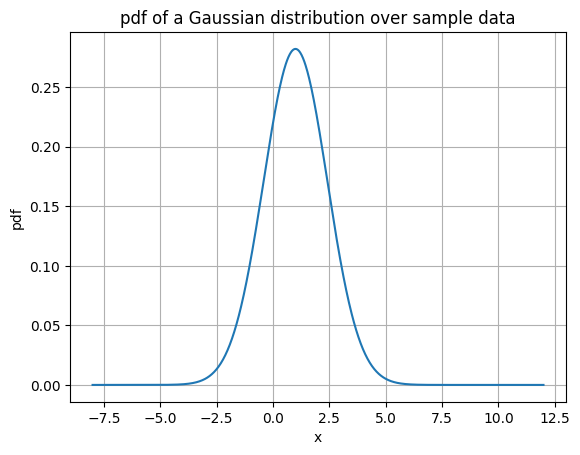

In [137]:
plotPdf_compute(XPlot, m, C)

In [138]:
pdfSol = np.load('llGAU.npy')
pdfGau = logpdf_GAU_ND(XPlot, m, C)
print(np.abs(pdfSol - pdfGau).max())

0.0


## Maximum Likelihood Estimate (MLE)

### Example 1: XND (Multidimensional) Dataset

We're gonne use the following sample data:

In [139]:
#Import ND dataset
ND_Path = "./loglikelihood_datasets/ND/"
XND = np.load(ND_Path + 'XND.npy')
print(f"XND shape: {XND.shape}")
print(f"M is {XND.shape[0]}")
print(f"N is {XND.shape[1]}")


XND shape: (2, 100)
M is 2
N is 100


The dataset has **M=2 dimensions**, so we will calculate the *log-pdf* of the **MVG** distibution.

The ML estimate for the parameters of a Multivariate Gaussian distribution correspond to the empirical
dataset mean and the empirical dataset covariance, which are:
$$
\mu_{ML} = \frac{1}{N} \sum_{i=1}^{N} x_i , \quad 
\Sigma_{ML} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)(x_i - \mu)^T
$$


In [140]:
mu_ML_ND, C_ML_ND = compute_mu_C(XND)
print(f"mu_ML:\n{mu_ML_ND}\nShape: {mu_ML_ND.shape}")
print(f"C_ML:\n{C}\nShape: {C.shape}")

mu_ML:
[[-0.07187197]
 [ 0.05979594]]
Shape: (2, 1)
C_ML:
[[2.]]
Shape: (1, 1)


The *log-pdf* is computed as before:

In [141]:
logpdf_ND = logpdf_GAU_ND(XND, mu_ML_ND, C_ML_ND)

Since the dataset is multidimensional (M = XND.shape[0] = 2), it's convenient to plot the **MVG** pdf using a 3D chart:

In [153]:
#from mpl_toolkits.mplot3d import Axes3D

def plotPdf3D_compute(XPlot, m, C):
    """
    Variant of the function plotPdf_compute that plots the pdf in 3D
    To be used when the dataset is multidimensional and so we compute the Multivariate Gaussian distribution
    Compute the log of the probability density function of a multivariate Gaussian distribution and plot it
    Parameters:
    - XPlot: numpy array of shape (1, N) -> it contains the values of the x-axis where the pdf will be plotted
    - m: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution
    """
    logpdf = logpdf_GAU_ND(XPlot, m, C)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(XPlot[0, :], XPlot[1, :], np.exp(logpdf), c=np.exp(logpdf), cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('PDF')
    ax.set_title('3D PDF of a Gaussian distribution')
    plt.show()


def plotPdf3D(XPlot, logpdf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(XPlot[0, :], XPlot[1, :], np.exp(logpdf), c=np.exp(logpdf), cmap='viridis')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('PDF')
    ax.set_title('3D PDF of a Multivariate Gaussian Distribution (MVG)')
    plt.show()

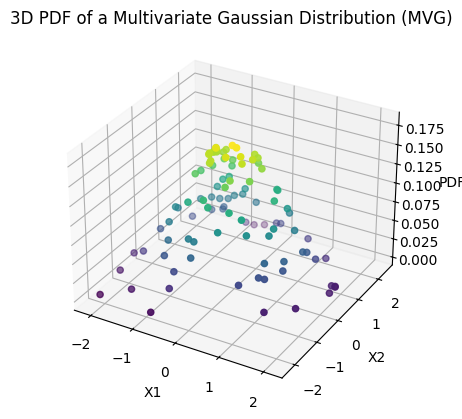

In [154]:
#Plot the pdf of the multivariate Gaussian distribution
plotPdf3D(XND, logpdf_ND)

Now we calculate the log-likelihood as the **the sum of the log-densities of each sample $x_{i}$**: <br>
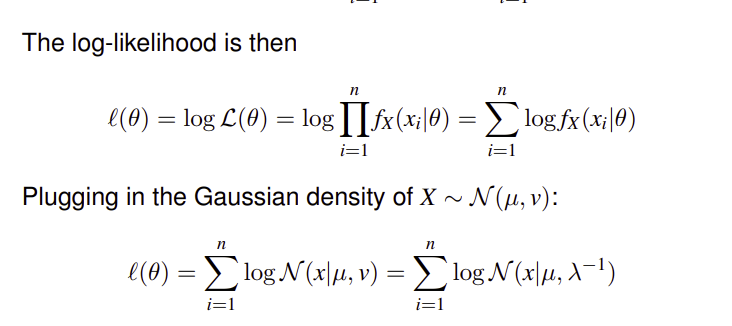


In [144]:
XND.shape

(2, 100)

In [145]:
def loglikelihood(X, mu, C):
    #Compute the log LIKEHOOD of the probability density function of a multivariate Gaussian distribution
    """
    Parameters
    - X: numpy array of shape (M, N) -> it contains multiple samples [x1, x2, ..., xN] having M features.
         X is a matrix of shape (M, N)!
    - mu: numpy array of shape (M,) -> mean of the distribution
    - C: numpy array of shape (M,M) -> covariance matrix of the distribution

    Returned values:
    - loglikelihood: float -> the log likelihood of the multivariate Gaussian distribution -> the sum of the logpdf of each sample, so it's a scalar value
    """

    #Compute the logpdf of the multivariate Gaussian distribution as done before
    #Then it's a function of shape (N,) where N is the number of samples
    #You can treat it a a discrete probability distribution and sum all the values to get the loglikelihood
    #Meaning, for each sample you take the logpdf[i] which in mathematical terms is the logpdf of the i-th sample, and then you sum all the logpdfs to get the loglikelihood

    logpdf = logpdf_GAU_ND(X, mu, C)

    """
    This method is worse in terms of complexity because it uses a for loop
    logLikelihood_acc = 0

    for i in range(X.shape[1]):
        logLikelihood_acc += logpdf[i]


    return logLikelihood_acc
    """

    return np.sum(logpdf)

def loglikelihood2(X, logpdf):
    #Compute the log LIKEHOOD of the probability density function of a multivariate Gaussian distribution
    """
    Parameters
    - X: numpy array of shape (M, N) -> it contains multiple samples [x1, x2, ..., xN] having M features.
         X is a matrix of shape (M, N)!
    - logpdf: numpy array of shape (1, N) -> it contains the log of the probability density function of the multivariate Gaussian -> ALREADY COMPUTED

    Returned values:
    - loglikelihood: float -> the log likelihood of the multivariate Gaussian distribution -> the sum of the logpdf of each sample, so it's a scalar value
    """
    return np.sum(logpdf)

In [146]:
ll = loglikelihood(XND, mu_ML_ND, C_ML_ND)
print(f"Log-Likehood: {ll}")

Log-Likehood: -270.70478023795044


In [147]:
ll_2 = loglikelihood2(XND, logpdf_ND)
print(f"Log-Likehood having already the logpdf: {ll_2}")

Log-Likehood having already the logpdf: -270.70478023795044


### Example 2: X1D Dataset

In this second example we use again a 1 dimensional dataset.

In [148]:
#Import X1D
_1D_Path = "./loglikelihood_datasets/1D/"
X1D = np.load(_1D_Path + 'X1D.npy')
print(f"X1D shape: {X1D.shape}")
print(f"M is {X1D.shape[0]}")
print(f"N is {X1D.shape[1]}")

X1D shape: (1, 10000)
M is 1
N is 10000


In [149]:
#Compure mu_ML and C_ML
mu_ML_1D, C_ML_1D = compute_mu_C(X1D)
print(f"mu_ML_1D:\n{mu_ML_1D}\nShape: {mu_ML_1D.shape}")
print(f"C_ML_1D:\n{C_ML_1D}\nShape: {C_ML_1D.shape}")

mu_ML_1D:
[[1.9539157]]
Shape: (1, 1)
C_ML_1D:
[[6.09542485]]
Shape: (1, 1)


The *log-pdf* is computed as before:

In [150]:
logpdf_1D = logpdf_GAU_ND(X1D, mu_ML_1D, C_ML_1D)
print(f"Shape of logpdf_1D: {logpdf_1D.shape}")

Shape of logpdf_1D: (10000,)


We can visualize how well the estimated density fits the samples plotting both the histogram of the
samples and the density (again, $m_{ML}$ and $C_{ML}$ are the ML estimates):

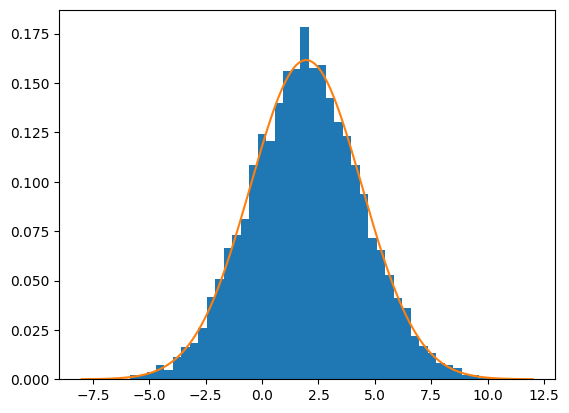

In [151]:
plt.figure()
plt.hist(X1D.ravel(), bins=50, density=True)
XPlot = np.linspace(-8, 12, 1000)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), mu_ML_1D, C_ML_1D)))

Then I can compute the log-likelihood:

In [152]:
ll_1D = loglikelihood(X1D, mu_ML_1D, C_ML_1D)
print(f"Log-Likehood: {ll_1D}")


Log-Likehood: -23227.077654602715


We can verify that computing the log-likelihood for other values of µ and Σ would results in a lower
value of the log-likelihood, so **we've actually maximized the log-likelihood!**